# ML LAB-6 

#### Data Sources: https://github.com/owid/covid-19-data/tree/master/public/data
####               https://en.wikipedia.org/wiki/World_Happiness_Report

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
cnt = pd.read_csv ("countries.csv")
cnt.sample(10)

,location,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,life_expectancy,human_development_index
17,Belize,397621,16.426,25.0,3.853,2.279,7824.362,NaN,74.62,0.708
73,Hong Kong,7496988,7039.714,44.8,16.303,10.158,56054.920,NaN,84.86,0.933
80,Ireland,4937796,69.874,38.7,13.928,8.678,67335.293,0.2,82.30,0.938
189,Zimbabwe,14862927,42.729,19.6,2.822,1.882,1899.775,21.4,61.49,0.535
43,Czechia,10708982,137.176,43.3,19.027,11.580,32605.906,NaN,79.38,0.888
31,Cape Verde,555988,135.580,25.7,4.460,3.437,6222.554,NaN,72.98,0.654
89,Kuwait,4270563,232.128,33.7,2.345,1.114,65530.537,NaN,75.49,0.803
97,Liechtenstein,38137,237.012,NaN,NaN,NaN,NaN,NaN,82.49,0.916
79,Iraq,40222503,88.125,20.0,3.186,1.957,15663.986,2.5,70.60,0.685
187,Yemen,29825968,53.508,20.3,2.922,1.583,1479.147,18.8,66.12,0.452


In [3]:
cnt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190 entries, 0 to 189
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   location                 190 non-null    object 
 1   population               190 non-null    int64  
 2   population_density       186 non-null    float64
 3   median_age               181 non-null    float64
 4   aged_65_older            179 non-null    float64
 5   aged_70_older            180 non-null    float64
 6   gdp_per_capita           182 non-null    float64
 7   extreme_poverty          124 non-null    float64
 8   life_expectancy          189 non-null    float64
 9   human_development_index  183 non-null    float64
dtypes: float64(8), int64(1), object(1)
memory usage: 15.0+ KB


In [4]:
happy_score_cnt = pd.read_csv('happiness_scores.csv')

In [5]:
happy_score_cnt.head()

,location,happiness_score
0,Finland,7.809
1,Denmark,7.646
2,Switzerland,7.560
3,Iceland,7.504
4,Norway,7.488


In [6]:
cnt = pd.merge(cnt, happy_score_cnt, on = "location", how = "left")
cnt.head()

,location,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,life_expectancy,human_development_index,happiness_score
0,Afghanistan,38928341,54.422,18.6,2.581,1.337,1803.987,NaN,64.83,0.498,2.567
1,Albania,2877800,104.871,38.0,13.188,8.643,11803.431,1.1,78.57,0.785,4.883
2,Algeria,43851043,17.348,29.1,6.211,3.857,13913.839,0.5,76.88,0.754,5.005
3,Andorra,77265,163.755,NaN,NaN,NaN,NaN,NaN,83.73,0.858,NaN
4,Angola,32866268,23.890,16.8,2.405,1.362,5819.495,NaN,61.15,0.581,NaN


# EDA

In [7]:
cnt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 190 entries, 0 to 189
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   location                 190 non-null    object 
 1   population               190 non-null    int64  
 2   population_density       186 non-null    float64
 3   median_age               181 non-null    float64
 4   aged_65_older            179 non-null    float64
 5   aged_70_older            180 non-null    float64
 6   gdp_per_capita           182 non-null    float64
 7   extreme_poverty          124 non-null    float64
 8   life_expectancy          189 non-null    float64
 9   human_development_index  183 non-null    float64
 10  happiness_score          149 non-null    float64
dtypes: float64(9), int64(1), object(1)
memory usage: 17.8+ KB


In [8]:
cnt.describe()

,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,life_expectancy,human_development_index,happiness_score
count,1.900000e+02,186.000000,181.000000,179.000000,180.000000,182.000000,124.000000,189.000000,183.000000,149.000000
mean,8.183077e+07,341.658210,30.204972,8.590022,5.436161,18439.706637,13.916129,72.862011,0.708869,5.472221
std,5.819950e+08,1612.572496,9.171031,6.198639,4.225454,19589.091950,20.311975,7.584835,0.154410,1.125246
min,8.090000e+02,1.980000,15.100000,1.144000,0.526000,661.240000,0.100000,53.280000,0.354000,2.567000
25%,2.367885e+06,35.972500,21.700000,3.421500,2.033500,3924.303000,0.600000,67.270000,0.588500,4.677000
50%,9.493482e+06,82.464000,29.400000,6.211000,3.541500,11822.138500,2.350000,74.250000,0.736000,5.515000
75%,3.076120e+07,208.157000,38.700000,14.053000,8.651750,26069.050500,21.675000,77.970000,0.823000,6.258000
max,7.794799e+09,19347.500000,48.200000,27.049000,18.493000,116935.600000,77.600000,86.750000,0.953000,7.809000


In [9]:
cnt[(cnt["population"] < 1000) | (cnt["population"] > 1000000000) | (cnt["population_density"] > 15000)]

,location,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,life_expectancy,human_development_index,happiness_score
35,China,1439323774,147.674,38.7,10.641,5.929,15308.712,0.7,76.91,0.752,5.124
76,India,1380004385,450.419,28.2,5.989,3.414,6426.674,21.2,69.66,0.640,3.573
111,Monaco,39244,19347.500,NaN,NaN,NaN,NaN,NaN,86.75,NaN,NaN
183,Vatican,809,NaN,NaN,NaN,NaN,NaN,NaN,75.12,NaN,NaN
186,World,7794798729,58.045,30.9,8.696,5.355,15469.207,10.0,72.58,NaN,NaN


In [10]:
cnt[(cnt["gdp_per_capita"] < 1000) | (cnt["extreme_poverty"] > 70)]

,location,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,life_expectancy,human_development_index,happiness_score
27,Burundi,11890781,423.062,17.5,2.562,1.504,702.225,71.7,61.58,0.417,3.775
32,Central African Republic,4829764,7.479,18.3,3.655,2.251,661.240,NaN,53.28,0.367,3.476
44,Democratic Republic of Congo,89561404,35.879,17.0,3.020,1.745,808.133,77.1,60.68,0.457,5.194
95,Liberia,5057677,49.127,19.2,3.057,1.756,752.788,38.6,64.10,0.435,4.558
100,Madagascar,27691019,43.951,19.6,2.929,1.686,1416.440,77.6,67.04,0.519,4.166
101,Malawi,19129955,197.519,18.1,2.979,1.783,1095.042,71.4,64.26,0.477,3.538
122,Niger,24206636,16.955,15.1,2.553,1.378,926.000,44.5,62.42,0.354,4.910


In [11]:
cnt.set_index("location", inplace = True)

In [12]:
cnt.head()

,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,life_expectancy,human_development_index,happiness_score
location,,,,,,,,,,
Afghanistan,38928341,54.422,18.6,2.581,1.337,1803.987,NaN,64.83,0.498,2.567
Albania,2877800,104.871,38.0,13.188,8.643,11803.431,1.1,78.57,0.785,4.883
Algeria,43851043,17.348,29.1,6.211,3.857,13913.839,0.5,76.88,0.754,5.005
Andorra,77265,163.755,NaN,NaN,NaN,NaN,NaN,83.73,0.858,NaN
Angola,32866268,23.890,16.8,2.405,1.362,5819.495,NaN,61.15,0.581,NaN


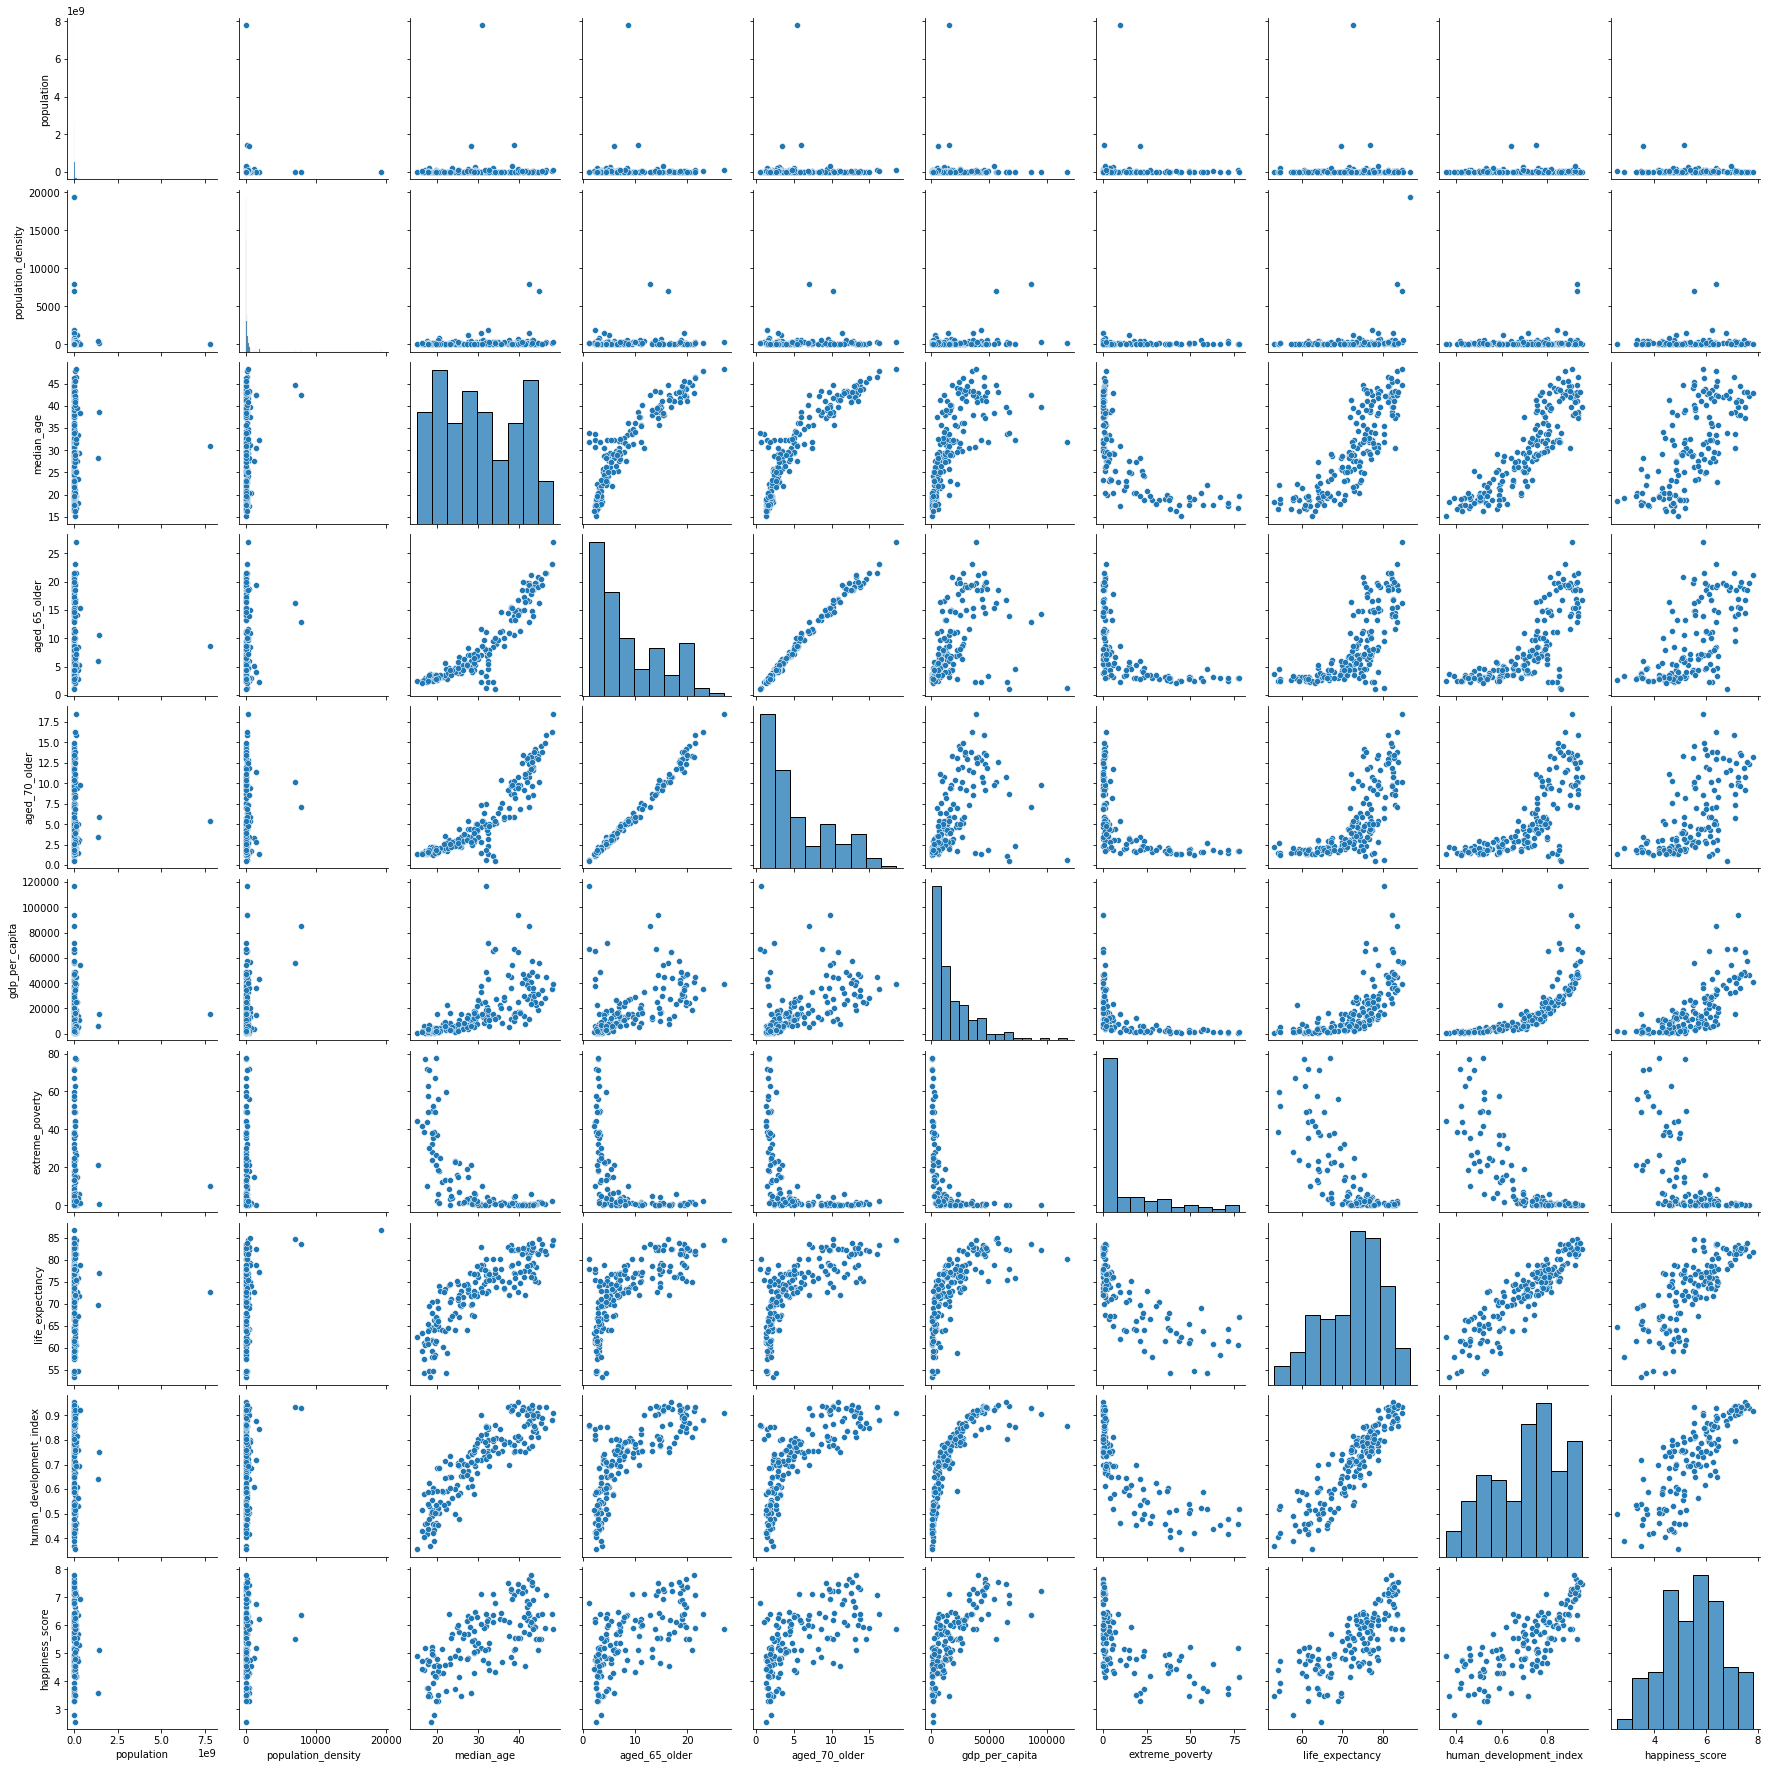

In [13]:
sns.pairplot(cnt)

In [14]:
cnt_new = cnt[["median_age", "aged_65_older", "gdp_per_capita", "extreme_poverty", "life_expectancy", "human_development_index", "happiness_score"]]
cnt_new.sample(10)

,median_age,aged_65_older,gdp_per_capita,extreme_poverty,life_expectancy,human_development_index,happiness_score
location,,,,,,,
Iraq,20.0,3.186,15663.986,2.5,70.60,0.685,4.785
Kosovo,NaN,NaN,9795.834,0.6,NaN,NaN,6.325
Congo,19.0,3.402,4881.406,37.0,64.57,0.606,4.311
Canada,41.4,16.984,44017.591,0.5,82.43,0.926,7.232
Zimbabwe,19.6,2.822,1899.775,21.4,61.49,0.535,3.299
Brazil,33.5,8.552,14103.452,3.4,75.88,0.759,6.376
Jordan,23.2,3.810,8337.490,0.1,74.53,0.735,4.633
Guinea,19.0,3.135,1998.926,35.3,61.60,0.459,4.949
Marshall Islands,NaN,NaN,3819.202,NaN,73.70,0.708,NaN


In [15]:
cnt_new.isnull().sum()

median_age                  9
aged_65_older              11
gdp_per_capita              8
extreme_poverty            66
life_expectancy             1
human_development_index     7
happiness_score            41
dtype: int64

In [16]:
cnt_new.loc["World"]

median_age                    30.900
aged_65_older                  8.696
gdp_per_capita             15469.207
extreme_poverty               10.000
life_expectancy               72.580
human_development_index          NaN
happiness_score                  NaN
Name: World, dtype: float64

In [17]:
for col in ["median_age", "aged_65_older", "life_expectancy"]:
    cnt_new[col].fillna(cnt_new[col]['World'], inplace=True)

cnt_new.isnull().sum()

median_age                  0
aged_65_older               0
gdp_per_capita              8
extreme_poverty            66
life_expectancy             0
human_development_index     7
happiness_score            41
dtype: int64

In [18]:
cnt_new['human_development_index'].fillna(cnt_new['human_development_index'].mean(), inplace=True)

cnt_new.isnull().sum()

median_age                  0
aged_65_older               0
gdp_per_capita              8
extreme_poverty            66
life_expectancy             0
human_development_index     0
happiness_score            41
dtype: int64

In [19]:
cnt_new[cnt_new["extreme_poverty"].isnull()].sample(20)

,median_age,aged_65_older,gdp_per_capita,extreme_poverty,life_expectancy,human_development_index,happiness_score
location,,,,,,,
Saint Lucia,34.9,9.721,12951.839,NaN,76.20,0.747000,NaN
Lebanon,31.1,8.514,13367.565,NaN,78.93,0.757000,4.772
Hong Kong,44.8,16.303,56054.920,NaN,84.86,0.933000,5.510
Venezuela,29.0,6.614,16745.022,NaN,72.06,0.761000,5.053
Czechia,43.3,19.027,32605.906,NaN,79.38,0.888000,6.911
Trinidad and Tobago,36.2,10.014,28763.071,NaN,73.51,0.784000,6.192
France,42.0,19.718,38605.671,NaN,82.66,0.901000,6.664
Suriname,29.6,6.933,13767.119,NaN,71.68,0.720000,NaN
Liechtenstein,30.9,8.696,NaN,NaN,82.49,0.916000,NaN


In [20]:
cnt_new.corr()["extreme_poverty"].sort_values(ascending = False)

extreme_poverty            1.000000
gdp_per_capita            -0.507473
aged_65_older             -0.573485
happiness_score           -0.600319
median_age                -0.697723
life_expectancy           -0.751798
human_development_index   -0.769612
Name: extreme_poverty, dtype: float64

In [21]:
cnt_new.corr()["gdp_per_capita"].sort_values(ascending = False)

gdp_per_capita             1.000000
human_development_index    0.750823
happiness_score            0.727942
life_expectancy            0.673646
median_age                 0.639722
aged_65_older              0.500403
extreme_poverty           -0.507473
Name: gdp_per_capita, dtype: float64

In [22]:
cnt_new.corr()["happiness_score"].sort_values(ascending = False)

happiness_score            1.000000
human_development_index    0.787390
life_expectancy            0.761917
gdp_per_capita             0.727942
median_age                 0.688966
aged_65_older              0.641272
extreme_poverty           -0.600319
Name: happiness_score, dtype: float64

In [23]:
from sklearn.cluster import KMeans

In [24]:
cnt_hdi = cnt_new["human_development_index"].values.reshape(-1, 1)

In [25]:
# !pip install yellowbrick 
from yellowbrick.cluster import KElbowVisualizer

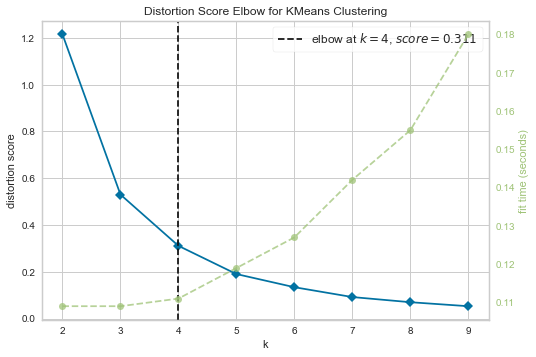

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [26]:
kmeans = KMeans()

visu = KElbowVisualizer(kmeans, k=(2, 10))
visu.fit(cnt_hdi)
visu.poof()

In [27]:
kmeans_model = KMeans(n_clusters=4).fit(cnt_hdi)

In [28]:
cnt_hdi_pred = kmeans_model.predict(cnt_hdi)

print(cnt_hdi_pred)

[1 0 0 2 3 0 2 0 2 2 0 0 2 3 0 0 2 0 1 3 0 0 0 0 2 0 1 1 3 3 2 3 1 1 2 0 0
 1 3 0 1 2 0 2 1 2 1 0 0 0 0 0 3 1 2 3 1 0 2 2 0 1 0 2 3 2 0 3 1 1 3 1 3 2
 2 2 3 0 0 0 2 2 2 0 2 0 0 3 0 0 3 3 2 0 1 1 0 2 2 2 1 1 0 0 1 2 0 1 0 0 0
 0 0 0 3 1 3 3 3 2 2 3 1 3 0 2 2 3 0 0 3 0 0 0 2 2 2 0 0 1 0 0 0 0 0 3 2 1
 0 0 1 2 2 2 3 0 0 2 1 2 0 1 0 2 2 3 0 3 3 0 3 1 0 0 0 1 0 2 2 2 0 0 3 0 0
 0 0 1 3 3]


In [29]:
np.unique(cnt_hdi_pred, return_counts=True)

(array([0, 1, 2, 3]), array([77, 32, 47, 34], dtype=int64))

In [30]:
cnt_new["hdi_clusters"] = cnt_hdi_pred
cnt_new.head(10)

,median_age,aged_65_older,gdp_per_capita,extreme_poverty,life_expectancy,human_development_index,happiness_score,hdi_clusters
location,,,,,,,,
Afghanistan,18.6,2.581,1803.987,NaN,64.83,0.498,2.567,1
Albania,38.0,13.188,11803.431,1.1,78.57,0.785,4.883,0
Algeria,29.1,6.211,13913.839,0.5,76.88,0.754,5.005,0
Andorra,30.9,8.696,NaN,NaN,83.73,0.858,NaN,2
Angola,16.8,2.405,5819.495,NaN,61.15,0.581,NaN,3
Antigua and Barbuda,32.1,6.933,21490.943,NaN,77.02,0.780,NaN,0
Argentina,31.9,11.198,18933.907,0.6,76.67,0.825,5.975,2
Armenia,35.7,11.232,8787.580,1.8,75.09,0.755,4.677,0
Australia,37.9,15.504,44648.710,0.5,83.44,0.939,7.223,2


In [31]:
hdi_avg_hs = cnt_new.groupby("hdi_clusters")["happiness_score"].mean()
hdi_avg_hs

hdi_clusters
0    5.462772
1    4.187074
2    6.659643
3    4.835957
Name: happiness_score, dtype: float64

In [32]:
cnt_new["happiness_score"] = cnt_new.groupby("hdi_clusters")["happiness_score"].apply(lambda x: x.fillna(x.mean()))

cnt_new.head(10)

,median_age,aged_65_older,gdp_per_capita,extreme_poverty,life_expectancy,human_development_index,happiness_score,hdi_clusters
location,,,,,,,,
Afghanistan,18.6,2.581,1803.987,NaN,64.83,0.498,2.567000,1
Albania,38.0,13.188,11803.431,1.1,78.57,0.785,4.883000,0
Algeria,29.1,6.211,13913.839,0.5,76.88,0.754,5.005000,0
Andorra,30.9,8.696,NaN,NaN,83.73,0.858,6.659643,2
Angola,16.8,2.405,5819.495,NaN,61.15,0.581,4.835957,3
Antigua and Barbuda,32.1,6.933,21490.943,NaN,77.02,0.780,5.462772,0
Argentina,31.9,11.198,18933.907,0.6,76.67,0.825,5.975000,2
Armenia,35.7,11.232,8787.580,1.8,75.09,0.755,4.677000,0
Australia,37.9,15.504,44648.710,0.5,83.44,0.939,7.223000,2


In [33]:
cnt_new.isnull().sum()

median_age                  0
aged_65_older               0
gdp_per_capita              8
extreme_poverty            66
life_expectancy             0
human_development_index     0
happiness_score             0
hdi_clusters                0
dtype: int64

In [34]:
cnt_new["gdp_per_capita"] = cnt_new.groupby("hdi_clusters")["gdp_per_capita"].apply(lambda x: x.fillna(x.mean()))
cnt_new["gdp_per_capita"] = cnt_new["gdp_per_capita"].fillna(cnt_new["gdp_per_capita"].mean())

cnt_new.head(10)

,median_age,aged_65_older,gdp_per_capita,extreme_poverty,life_expectancy,human_development_index,happiness_score,hdi_clusters
location,,,,,,,,
Afghanistan,18.6,2.581,1803.987000,NaN,64.83,0.498,2.567000,1
Albania,38.0,13.188,11803.431000,1.1,78.57,0.785,4.883000,0
Algeria,29.1,6.211,13913.839000,0.5,76.88,0.754,5.005000,0
Andorra,30.9,8.696,44328.198822,NaN,83.73,0.858,6.659643,2
Angola,16.8,2.405,5819.495000,NaN,61.15,0.581,4.835957,3
Antigua and Barbuda,32.1,6.933,21490.943000,NaN,77.02,0.780,5.462772,0
Argentina,31.9,11.198,18933.907000,0.6,76.67,0.825,5.975000,2
Armenia,35.7,11.232,8787.580000,1.8,75.09,0.755,4.677000,0
Australia,37.9,15.504,44648.710000,0.5,83.44,0.939,7.223000,2


In [35]:
hdi_avg_pvrty = cnt_new.groupby("hdi_clusters")["extreme_poverty"].mean()        
hdi_avg_pvrty

hdi_clusters
0     2.352174
1    43.400000
2     0.607407
3    18.904000
Name: extreme_poverty, dtype: float64

In [36]:
cnt_new["extreme_poverty"] = cnt_new.groupby("hdi_clusters")["extreme_poverty"].apply(lambda x: x.fillna(x.mean()))
cnt_new["extreme_poverty"] = cnt_new["extreme_poverty"].fillna(cnt_new["extreme_poverty"].mean())

cnt_new.head(10)

,median_age,aged_65_older,gdp_per_capita,extreme_poverty,life_expectancy,human_development_index,happiness_score,hdi_clusters
location,,,,,,,,
Afghanistan,18.6,2.581,1803.987000,43.400000,64.83,0.498,2.567000,1
Albania,38.0,13.188,11803.431000,1.100000,78.57,0.785,4.883000,0
Algeria,29.1,6.211,13913.839000,0.500000,76.88,0.754,5.005000,0
Andorra,30.9,8.696,44328.198822,0.607407,83.73,0.858,6.659643,2
Angola,16.8,2.405,5819.495000,18.904000,61.15,0.581,4.835957,3
Antigua and Barbuda,32.1,6.933,21490.943000,2.352174,77.02,0.780,5.462772,0
Argentina,31.9,11.198,18933.907000,0.600000,76.67,0.825,5.975000,2
Armenia,35.7,11.232,8787.580000,1.800000,75.09,0.755,4.677000,0
Australia,37.9,15.504,44648.710000,0.500000,83.44,0.939,7.223000,2


In [37]:
cnt_new.isnull().sum()

median_age                 0
aged_65_older              0
gdp_per_capita             0
extreme_poverty            0
life_expectancy            0
human_development_index    0
happiness_score            0
hdi_clusters               0
dtype: int64

In [38]:
cnt_new1 = cnt_new.drop("hdi_clusters", axis=1)
cnt_new1.sample(10)

,median_age,aged_65_older,gdp_per_capita,extreme_poverty,life_expectancy,human_development_index,happiness_score
location,,,,,,,
Montenegro,39.1,14.762,16409.288,1.000000,76.88,0.814,5.546
Algeria,29.1,6.211,13913.839,0.500000,76.88,0.754,5.005
Argentina,31.9,11.198,18933.907,0.600000,76.67,0.825,5.975
France,42.0,19.718,38605.671,0.607407,82.66,0.901,6.664
Serbia,41.2,17.366,14048.881,2.352174,76.00,0.787,5.778
Czechia,43.3,19.027,32605.906,0.607407,79.38,0.888,6.911
Ecuador,28.1,7.104,10581.936,3.600000,77.01,0.752,5.925
Estonia,42.7,19.452,29481.252,0.500000,78.74,0.871,6.022
Thailand,40.1,11.373,16277.671,0.100000,77.15,0.755,5.999


In [39]:
from pyclustertend import hopkins
from sklearn.preprocessing import scale

In [40]:
hopkins(cnt_new1, cnt_new1.shape[0])

0.17883996468396768

In [41]:
hopkins(scale(cnt_new1), cnt_new1.shape[0])

0.14164234632632877

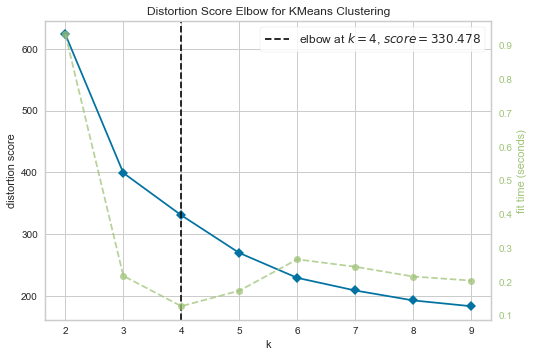

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [42]:
kmeans = KMeans()

visu = KElbowVisualizer(kmeans, k=(2, 10))
visu.fit(scale(cnt_new1))
visu.poof()

In [43]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(cnt_new1)

StandardScaler()

In [44]:
cnt_new1_scaled = scaler.transform(cnt_new1)

In [45]:
kmeans_model = KMeans(n_clusters=4, random_state=18).fit(cnt_new1_scaled)

In [46]:
cnt_new1_scaled_pred = kmeans_model.predict(cnt_new1_scaled)

print(cnt_new1_scaled_pred)

[1 0 0 2 3 0 0 0 2 2 0 0 0 3 0 0 2 0 1 3 0 0 3 0 2 2 1 1 3 3 2 3 1 1 0 0 0
 3 1 0 1 2 0 2 1 2 3 0 0 0 3 0 3 1 2 3 1 0 2 2 3 3 0 2 3 2 0 0 1 1 3 3 3 2
 2 2 3 0 0 3 2 2 2 0 2 3 0 1 0 0 3 3 2 0 1 1 0 2 2 2 1 1 0 0 1 2 0 3 0 0 0
 0 0 0 0 1 3 3 3 2 2 0 1 1 0 2 0 3 3 0 3 0 0 0 2 2 2 2 0 1 0 0 0 3 0 3 0 1
 0 0 1 2 2 2 3 3 3 2 1 2 0 1 0 2 2 3 0 3 1 0 3 1 0 0 0 1 0 2 2 2 0 0 3 0 0
 0 0 3 1 1]


In [47]:
np.unique(cnt_new1_scaled_pred, return_counts=True)

(array([0, 1, 2, 3]), array([74, 32, 44, 40], dtype=int64))

In [48]:
from sklearn.metrics import silhouette_score
silhouette_score(cnt_new1_scaled, cnt_new1_scaled_pred)

0.3279574327656786

In [49]:
cnt_new1['Kmeans_clusters'] = cnt_new1_scaled_pred

cnt_new1.sample(15)

,median_age,aged_65_older,gdp_per_capita,extreme_poverty,life_expectancy,human_development_index,happiness_score,Kmeans_clusters
location,,,,,,,,
Sri Lanka,34.1,10.069,11669.077000,0.700000,76.98,0.770000,4.327000,0
Bahamas,34.3,8.996,27717.847000,2.352174,73.92,0.807000,5.462772,0
Georgia,38.7,14.864,9745.079000,4.200000,73.77,0.780000,4.673000,0
Mali,16.4,2.519,2014.306000,43.400000,59.31,0.427000,4.729000,1
Singapore,42.4,12.922,85535.383000,0.607407,83.62,0.932000,6.377000,2
Greece,45.3,20.396,24574.382000,1.500000,82.24,0.870000,5.515000,2
Oman,30.7,2.355,37960.709000,0.607407,77.86,0.821000,6.659643,0
Gabon,23.1,4.450,16562.413000,3.400000,66.47,0.702000,4.829000,3
Central African Republic,18.3,3.655,661.240000,43.400000,53.28,0.367000,3.476000,1


In [50]:
cnt_new1[cnt_new1['Kmeans_clusters'] == 2].tail(20)

,median_age,aged_65_older,gdp_per_capita,extreme_poverty,life_expectancy,human_development_index,happiness_score,Kmeans_clusters
location,,,,,,,,
Lithuania,43.5,19.002,29524.265,0.700000,75.93,0.858,6.215000,2
Luxembourg,39.7,14.312,94277.965,0.200000,82.25,0.904,7.238000,2
Malta,42.4,19.426,36513.323,0.200000,82.53,0.878,6.773000,2
Netherlands,43.2,18.779,48472.545,0.607407,82.28,0.931,7.449000,2
New Zealand,37.9,15.322,36085.843,0.607407,82.29,0.917,7.300000,2
Norway,39.7,16.821,64800.057,0.200000,82.40,0.953,7.488000,2
Poland,41.8,16.763,27216.445,0.607407,78.73,0.865,6.186000,2
Portugal,46.2,21.502,27936.896,0.500000,82.05,0.847,5.911000,2
Qatar,31.9,1.307,116935.600,0.607407,80.23,0.856,6.659643,2


In [51]:
cnt_new1[cnt_new1['Kmeans_clusters'] == 0].tail(20)

,median_age,aged_65_older,gdp_per_capita,extreme_poverty,life_expectancy,human_development_index,happiness_score,Kmeans_clusters
location,,,,,,,,
Saint Lucia,34.9,9.721,12951.839000,2.352174,76.20,0.747000,5.462772,0
Saint Vincent and the Grenadines,31.8,7.724,10727.146000,2.352174,72.53,0.723000,5.462772,0
San Marino,30.9,8.696,56861.470000,2.352174,84.97,0.708869,5.462772,0
Saudi Arabia,31.9,3.295,49045.411000,0.607407,75.13,0.853000,6.406000,0
Serbia,41.2,17.366,14048.881000,2.352174,76.00,0.787000,5.778000,0
Seychelles,36.2,8.606,26382.287000,1.100000,73.40,0.797000,5.462772,0
Sri Lanka,34.1,10.069,11669.077000,0.700000,76.98,0.770000,4.327000,0
Suriname,29.6,6.933,13767.119000,2.352174,71.68,0.720000,5.462772,0
Taiwan,42.2,8.696,15611.501792,2.352174,80.46,0.708869,6.455000,0


In [52]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [53]:
linked = linkage(cnt_new1_scaled, "ward")

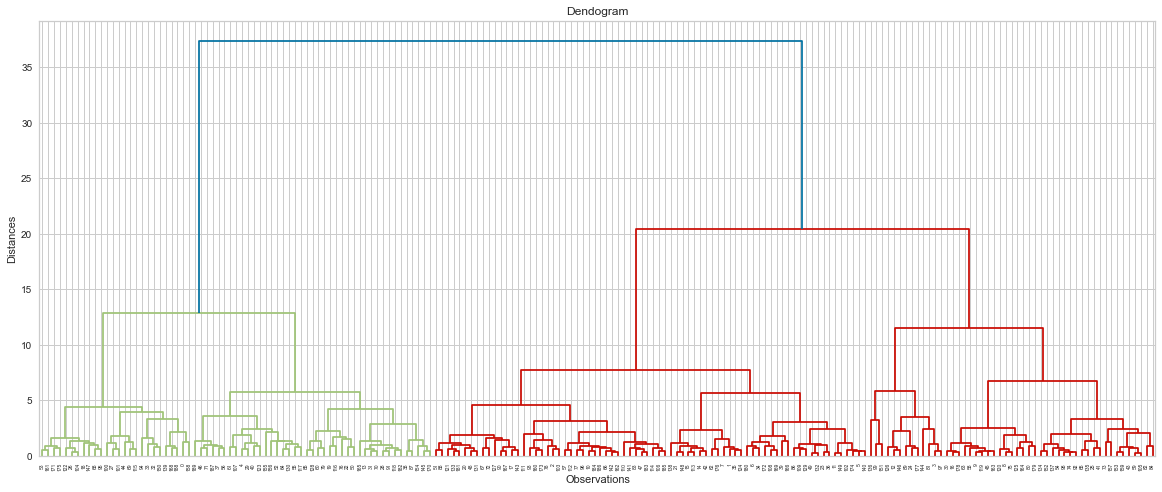

In [54]:
plt.figure(figsize = (20,8))
plt.title("Dendogram")
plt.xlabel("Observations")
plt.ylabel("Distances")
dendrogram(linked);

In [55]:
from sklearn.cluster import AgglomerativeClustering

In [56]:
Hr_model = AgglomerativeClustering (n_clusters = 4)
cnt_new1_scaled_pred_hr = Hr_model.fit_predict(cnt_new1_scaled)

In [57]:
clusters = Hr_model.labels_

In [58]:
np.unique(cnt_new1_scaled_pred_hr, return_counts=True)

(array([0, 1, 2, 3], dtype=int64), array([49, 41, 74, 26], dtype=int64))

In [59]:
silhouette_score(cnt_new1_scaled, cnt_new1_scaled_pred_hr)

0.3325160029932969

In [60]:
cnt_new1["Hr_predicted_clusters"]=clusters

In [61]:
cnt_new1.sample(20)

,median_age,aged_65_older,gdp_per_capita,extreme_poverty,life_expectancy,human_development_index,happiness_score,Kmeans_clusters,Hr_predicted_clusters
location,,,,,,,,,
Ireland,38.7,13.928,67335.293000,0.200000,82.30,0.938000,7.094000,2,0
Barbados,39.8,14.952,16978.068000,2.352174,79.19,0.800000,5.462772,0,2
Egypt,25.3,5.159,10550.206000,1.300000,71.99,0.696000,4.151000,3,1
Argentina,31.9,11.198,18933.907000,0.600000,76.67,0.825000,5.975000,0,2
Myanmar,29.1,5.732,5591.597000,6.400000,67.13,0.578000,4.308000,3,1
Gambia,17.5,2.339,1561.767000,10.100000,62.05,0.460000,4.751000,3,1
Belize,25.0,3.853,7824.362000,2.352174,74.62,0.708000,5.462772,0,2
San Marino,30.9,8.696,56861.470000,2.352174,84.97,0.708869,5.462772,0,0
Laos,24.4,4.029,6397.360000,22.700000,67.92,0.601000,4.889000,3,1


In [62]:
cnt_new1[cnt_new1['Kmeans_clusters'] == 0].index

Index(['Albania', 'Algeria', 'Antigua and Barbuda', 'Argentina', 'Armenia',
       'Azerbaijan', 'Bahamas', 'Bahrain', 'Barbados', 'Belarus', 'Belize',
       'Bolivia', 'Bosnia and Herzegovina', 'Brazil', 'Chile', 'China',
       'Colombia', 'Costa Rica', 'Cuba', 'Dominica', 'Dominican Republic',
       'Ecuador', 'El Salvador', 'Fiji', 'Georgia', 'Grenada', 'Guatemala',
       'Indonesia', 'Iran', 'Jamaica', 'Kazakhstan', 'Kosovo', 'Kuwait',
       'Lebanon', 'Libya', 'Malaysia', 'Maldives', 'Marshall Islands',
       'Mauritius', 'Mexico', 'Moldova', 'Monaco', 'Mongolia', 'Montenegro',
       'Morocco', 'Nicaragua', 'North Macedonia', 'Oman', 'Panama', 'Paraguay',
       'Peru', 'Philippines', 'Russia', 'Saint Kitts and Nevis', 'Saint Lucia',
       'Saint Vincent and the Grenadines', 'San Marino', 'Saudi Arabia',
       'Serbia', 'Seychelles', 'Sri Lanka', 'Suriname', 'Taiwan', 'Thailand',
       'Trinidad and Tobago', 'Tunisia', 'Turkey', 'Ukraine', 'Uruguay',
       'Uzbekistan',

In [63]:
cnt_new1[cnt_new1['Hr_predicted_clusters'] == 2].index

Index(['Albania', 'Algeria', 'Antigua and Barbuda', 'Argentina', 'Armenia',
       'Azerbaijan', 'Bahamas', 'Barbados', 'Belarus', 'Belize', 'Bolivia',
       'Bosnia and Herzegovina', 'Brazil', 'Chile', 'China', 'Colombia',
       'Costa Rica', 'Cuba', 'Dominica', 'Dominican Republic', 'Ecuador',
       'El Salvador', 'Fiji', 'Georgia', 'Grenada', 'Guatemala', 'Honduras',
       'Indonesia', 'Iran', 'Jamaica', 'Kazakhstan', 'Kosovo', 'Kyrgyzstan',
       'Lebanon', 'Libya', 'Malaysia', 'Maldives', 'Marshall Islands',
       'Mauritius', 'Mexico', 'Moldova', 'Monaco', 'Mongolia', 'Montenegro',
       'Morocco', 'Nicaragua', 'North Macedonia', 'Pakistan', 'Panama',
       'Paraguay', 'Peru', 'Philippines', 'Russia', 'Saint Kitts and Nevis',
       'Saint Lucia', 'Saint Vincent and the Grenadines', 'Samoa', 'Serbia',
       'Seychelles', 'Sri Lanka', 'Suriname', 'Taiwan', 'Tajikistan',
       'Thailand', 'Trinidad and Tobago', 'Tunisia', 'Turkey', 'Ukraine',
       'Uruguay', 'Uzbekistan

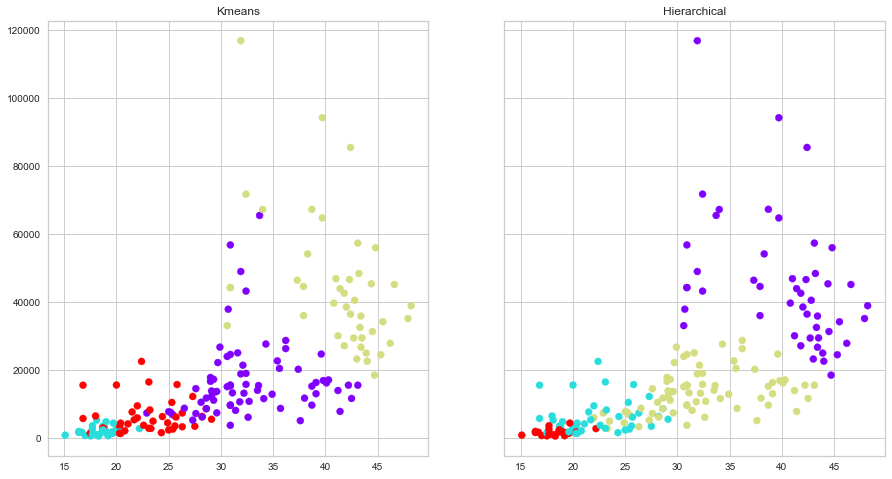

In [64]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(15,8))
ax1.set_title('Kmeans')
ax1.scatter(cnt_new1.iloc[:,0], cnt_new1.iloc[:,2], c = cnt_new1["Kmeans_clusters"], s = 50, cmap = "rainbow")
ax2.set_title("Hierarchical")
ax2.scatter(cnt_new1.iloc[:,0], cnt_new1.iloc[:,2], c = cnt_new1["Hr_predicted_clusters"], s = 50, cmap = "rainbow")

In [65]:
#cnt_new1.to_csv("cnt.csv")